In [1]:
# Compare CRM variables at single column between two simulations 
import cartopy.crs as ccrs
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pickle
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import sys
from IPython.display import HTML
sys.setrecursionlimit(9000)

In [2]:
# Set the location of the column
Center_lons = np.array([270., 275.0, 280., 285.])
Center_lat = -15.0
nx=len(Center_lons)


In [5]:
# Model output paths
PATH = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
PATH2 = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
varname = "CRM_W"
files = xr.open_mfdataset(PATH+"/*.cam.h0.2008-10-01-[123]*.nc")
files2 = xr.open_mfdataset(PATH2+"/*.cam.h0.2008-10-01-[123]*.nc")
lon = files.lon.isel(time=0).values
lat = files.lat.isel(time=0).values

In [6]:
# Function calculate the distance between two points
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

In [7]:
# Find the column index corresponds to the minimum distance
ncols = np.empty(shape=nx)
for ix in range(nx-1):
    ddmin = 99999999.0
    for il in range(4166):
        dd = distance(lat[il], lon[il], Center_lat, Center_lons[ix])
        if dd<ddmin:
            ddmin = dd
            minindex = il
    ncols[ix] = int(minindex)

ncols = ncols.astype(int)

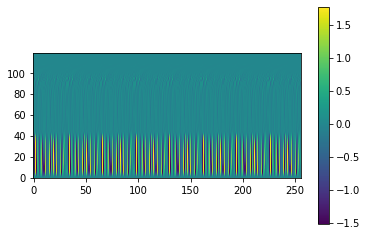

In [8]:
# Test image for honing the formatting (sandbox
nz = 50
it = 10
varname = "CRM_W"
evalstring = "np.squeeze(files."+varname+".isel(ncol=ncols[0]).isel(time=it).values)"
I0 = eval(evalstring)

X = np.ndarray.flatten(I0)
minval = min(X); maxval = max(X)
cmin = minval
cmax = maxval


# now we have a variable-aware min/max value for the colorbar which was extracted
# from the first run (dx=1600m) at the 50th time sample and we will apply those
# limits universally.
X = np.tile(I0,8)
plt.imshow(X,origin='lower'); plt.clim(cmin,cmax); plt.colorbar()


In [9]:
files

<xarray.Dataset>
Dimensions:              (cosp_dbze: 15, cosp_ht: 40, cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6, cosp_reffliq: 6, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7, cosp_tau_modis: 7, crm_nx: 32, crm_ny: 1, crm_nz: 120, ilev: 126, lev: 125, lwband: 16, nbnd: 2, ncol: 6144, swband: 14, time: 50)
Coordinates:
  * lev                  (lev) float64 2.172 2.645 3.221 ... 987.0 993.5 998.4
  * ilev                 (ilev) float64 1.959 2.386 2.905 ... 990.2 996.7 1e+03
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 100.0
  * cosp_scol            (cosp_scol) int32 1 2 3 4 5 6 7 8 9 10
  * cosp_ht              (cosp_ht) float64 1.896e+04 1.848e+04 ... 720.0 240.0
  * cosp_sr              (cosp_sr) float64 -0.495 0.605 2.1 ... 55.0 70.0 539.5
  * cosp_sza             (cosp_sza) float64 0.0 20.0 40.0 60.0 80.0
  * cosp_dbze            (cosp_dbze) float64 -72.5 -42.5 -37.5

./new_CRM_W.mp4
./new_CRM_T.mp4


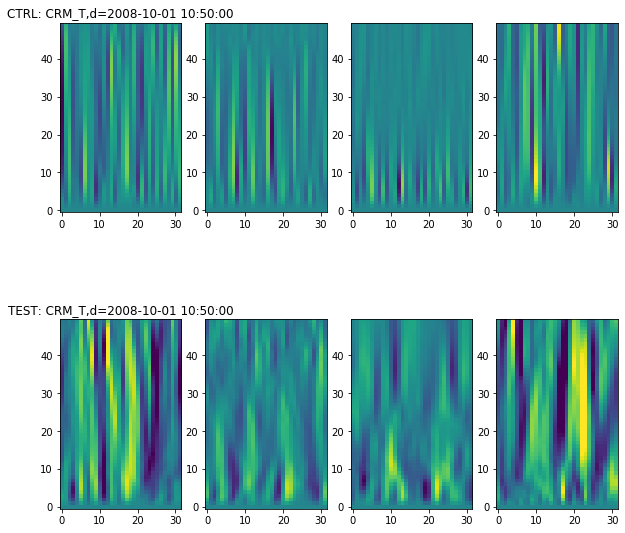

In [10]:
fig, ax = plt.subplots(2,nx,figsize=(10,10))
nz = 50
varnames = ["CRM_W","CRM_T"]
for varname in varnames:
    figs = []
    evalstring = "np.squeeze(files."+varname+".isel(ncol=ncols[0]).isel(time=it).values)"
    I0 = eval(evalstring)
    I0 = I0[0:nz,:]
    X = np.ndarray.flatten(I0)
    minval = min(X); maxval = max(X)
    cmin = minval
    cmax = maxval    
    for it in range(0,len(files.time.values)-1):   
        I0 = eval("np.squeeze(files."+varname+".isel(ncol=ncols[0]).isel(time=it).values)")              
        I0 = I0[0:nz,:]
        I1 = eval("np.squeeze(files."+varname+".isel(ncol=ncols[1]).isel(time=it).values)")
        I1 = I1[0:nz,:]
        I2 = eval("np.squeeze(files."+varname+".isel(ncol=ncols[2]).isel(time=it).values)")
        I2 = I2[0:nz,:]
        I3 = eval("np.squeeze(files."+varname+".isel(ncol=ncols[3]).isel(time=it).values)")
        I3 = I3[0:nz,:]
        titlestring = ("CTRL: "+varname+",d="+str(files.time[it].values))
        ax[0,0].set_title(titlestring)
        cs0 = ax[0,0].imshow(I0,origin='lower',clim=[cmin,cmax]); 
        cs1 = ax[0,1].imshow(I1,origin='lower',clim=[cmin,cmax]); 
        cs2 = ax[0,2].imshow(I2,origin='lower',clim=[cmin,cmax]); 
        cs3 = ax[0,3].imshow(I3,origin='lower',clim=[cmin,cmax]); 

        #other sim, same collection of points:
        I4 = eval("np.squeeze(files2."+varname+".isel(ncol=ncols[0]).isel(time=it).values)")
    #    I4 = np.tile(I4[0:nz,:],8)
        I4 = I4[0:nz,:]
        I5 = eval("np.squeeze(files2."+varname+".isel(ncol=ncols[1]).isel(time=it).values)")             
        I5 = I5[0:nz,:]
        I6 = eval("np.squeeze(files2."+varname+".isel(ncol=ncols[2]).isel(time=it).values)")             
        I6 = I6[0:nz,:]
        I7 = eval("np.squeeze(files2."+varname+".isel(ncol=ncols[3]).isel(time=it).values)")             
        I7 = I7[0:nz,:]
        titlestring = ("TEST: "+varname+",d="+str(files.time[it].values))
        ax[1,0].set_title(titlestring)
        cs4 = ax[1,0].imshow(I4,origin='lower',clim=[cmin,cmax]); 
        cs5 = ax[1,1].imshow(I5,origin='lower',clim=[cmin,cmax]); 
        cs6 = ax[1,2].imshow(I6,origin='lower',clim=[cmin,cmax]);
        cs7 = ax[1,3].imshow(I7,origin='lower',clim=[cmin,cmax]);

        figs.append([cs0,cs1,cs2,cs3,cs4,cs5,cs6,cs7])

    ani = animation.ArtistAnimation(fig, figs, interval=150, blit=False, repeat=True)
    filename = "./new_"+varname + ".mp4"
    ani.save(filename)
    print(filename)


In [11]:
from IPython.display import Video
Video(filename)


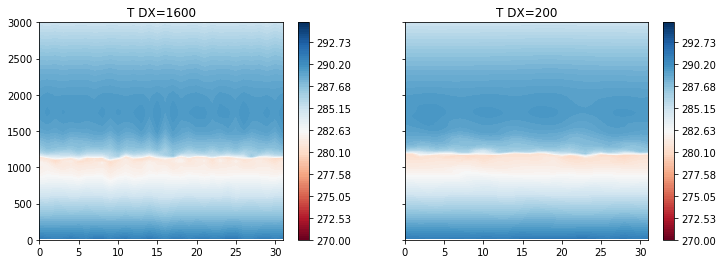

In [12]:
# Plot the CRM_T
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(270, 295, 100)
cs = ax1.contourf(x,Z3p,  CRMTp,levels=levels,cmap = 'RdBu')
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('T DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTp2,levels=levels,cmap = 'RdBu')
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('T DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

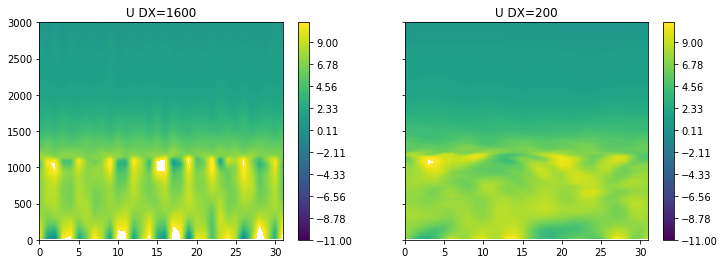

In [13]:
# Plot the CRM_U
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(-11, 11, 100)
cs = ax1.contourf(x,Z3p,  CRMUp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('U DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMUp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('U DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

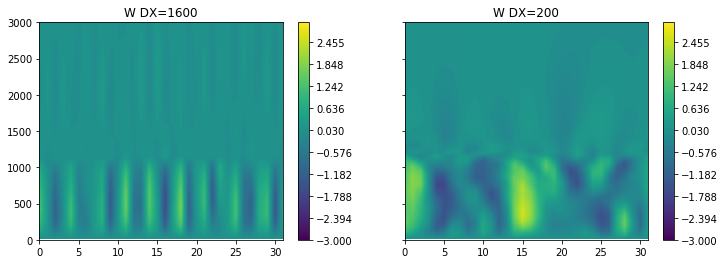

In [14]:
# Plot the CRM_W
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(-3, 3, 100)
cs = ax1.contourf(x,Z3p,  CRMWp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('W DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMWp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('W DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

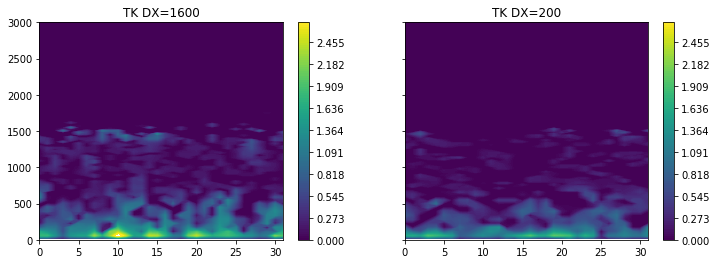

In [13]:
# Plot the CRM_TK
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 2.70, 100)
cs = ax1.contourf(x,Z3p,  CRMTKp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('TK DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTKp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('TK DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

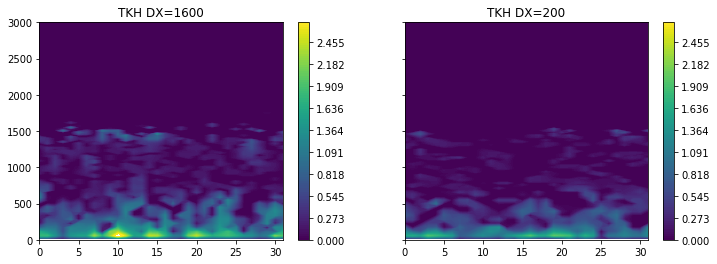

In [14]:
# Plot the CRM_TKH
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 2.70, 100)
cs = ax1.contourf(x,Z3p,  CRMTKHp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('TKH DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTKHp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('TKH DX=200')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

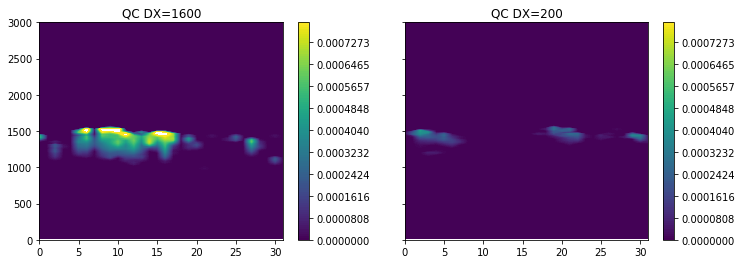

In [15]:
# Plot the CRM_QC
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 0.00080, 100)
cs = ax1.contourf(x,Z3p,  CRMQCp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('QC DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMQCp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('QC DX=200')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()